# Home Temperature and Presence Prediction

This kernel is a personal training project. It aim's to predict the temperature in my appartment at a specific time to have the right temperature when I will be back home

In [151]:
import pandas as pd
import numpy as np
import time
import datetime
import tqdm
from matplotlib import pyplot

data_home = pd.read_csv('./export_temperature.csv')
data_home = data_home[(data_home['date'].str.find('00:00:00.000000') == -1) & (data_home['temperature'] != 2147483647)]
data_home = data_home.reset_index(drop=True)
data_plugs = pd.read_csv('./export_plugs.csv')
data_plugs = data_plugs[(data_plugs['date'].str.find('00:00:00.000000') == -1)]
data_plugs = data_plugs.reset_index(drop=True)

data_home = data_home.head(12000)
data_plugs = data_plugs.head(12000)

print(data_home.shape)
print(data_plugs.shape)

a_hours = []
a_prev_temp = []

j=0
for value in data_home.values:
    data_home.at[j, 'date'] = data_home.values[j][1].split(' ')[0]
    a_hours.append(value[1].split(' ')[1].split('.')[0][:5])
    
    if j!=0:
        a_prev_temp.append(data_home.values[j-1][2])
    else:
        a_prev_temp.append(data_home.values[j][2])
    j+=1
    
data_home = data_home.assign(hour = pd.Series(a_hours).values)
data_home = data_home.assign(prev_temp = pd.Series(a_prev_temp).values)

a_hours = []
j=0
for value in data_plugs.values:
    data_plugs.at[j, 'date'] = data_plugs.values[j][1].split(' ')[0]
    a_hours.append(value[1].split(' ')[1].split('.')[0][:5])
    j+=1
    
data_plugs = data_plugs.assign(hour = pd.Series(a_hours).values)

(12000, 5)
(12000, 4)


In [180]:
data_home = data_home.assign(heater_on= pd.Series([ np.nan for a in range(len(a_prev_temp))]))

def format_as_min(val):
    if(int(val) < 10):
        return f'0{val}'
    return val

def get_hours_minus_x_min(hour, nb_min):
    return f'{hour[:2] if int(hour[-2:]) != 0 else int(hour[:2])-nb_min}:{ format_as_min(int(hour[-2:])-nb_min) if int(hour[-2:]) != 0 else 59 }'


j=0
for value in data_home.values:
    data = data_plugs[(data_plugs['date'] == value[1]) & ((data_plugs['hour'] == get_hours_minus_x_min(value[5], 1)) |(data_plugs['hour'] == value[5]) | (data_plugs['hour'] == get_hours_minus_x_min(value[5], -1)))].head(1)

    if len(data) == 1:
        # print(data_plugs[(data_plugs['date'] == value[1])])
        # print(data)
        # print(value[0], value[1], value[5])
        data_home.at[j, 'heater_on'] = data_plugs.iloc[data.index[0]]['heater_status']
    j+=1

    

Int64Index([0], dtype='int64')
Int64Index([0], dtype='int64')
Int64Index([0], dtype='int64')
Int64Index([0], dtype='int64')
Int64Index([4], dtype='int64')
Int64Index([5], dtype='int64')
Int64Index([6], dtype='int64')
Int64Index([7], dtype='int64')
Int64Index([7], dtype='int64')
Int64Index([7], dtype='int64')
Int64Index([10], dtype='int64')
Int64Index([11], dtype='int64')
Int64Index([12], dtype='int64')
Int64Index([12], dtype='int64')
Int64Index([12], dtype='int64')
Int64Index([12], dtype='int64')
Int64Index([14], dtype='int64')
Int64Index([17], dtype='int64')
Int64Index([17], dtype='int64')
Int64Index([17], dtype='int64')
Int64Index([17], dtype='int64')
Int64Index([17], dtype='int64')
Int64Index([17], dtype='int64')
Int64Index([17], dtype='int64')
Int64Index([17], dtype='int64')
Int64Index([20], dtype='int64')
Int64Index([26], dtype='int64')
Int64Index([27], dtype='int64')
Int64Index([29], dtype='int64')
Int64Index([30], dtype='int64')
Int64Index([31], dtype='int64')
Int64Index([32], d

Int64Index([304], dtype='int64')
Int64Index([305], dtype='int64')
Int64Index([306], dtype='int64')
Int64Index([307], dtype='int64')
Int64Index([308], dtype='int64')
Int64Index([309], dtype='int64')
Int64Index([310], dtype='int64')
Int64Index([311], dtype='int64')
Int64Index([312], dtype='int64')
Int64Index([313], dtype='int64')
Int64Index([314], dtype='int64')
Int64Index([315], dtype='int64')
Int64Index([316], dtype='int64')
Int64Index([317], dtype='int64')
Int64Index([318], dtype='int64')
Int64Index([319], dtype='int64')
Int64Index([320], dtype='int64')
Int64Index([321], dtype='int64')
Int64Index([322], dtype='int64')
Int64Index([323], dtype='int64')
Int64Index([324], dtype='int64')
Int64Index([325], dtype='int64')
Int64Index([326], dtype='int64')
Int64Index([327], dtype='int64')
Int64Index([328], dtype='int64')
Int64Index([329], dtype='int64')
Int64Index([330], dtype='int64')
Int64Index([331], dtype='int64')
Int64Index([332], dtype='int64')
Int64Index([333], dtype='int64')
Int64Index

Int64Index([593], dtype='int64')
Int64Index([594], dtype='int64')
Int64Index([595], dtype='int64')
Int64Index([596], dtype='int64')
Int64Index([597], dtype='int64')
Int64Index([598], dtype='int64')
Int64Index([599], dtype='int64')
Int64Index([600], dtype='int64')
Int64Index([601], dtype='int64')
Int64Index([602], dtype='int64')
Int64Index([603], dtype='int64')
Int64Index([604], dtype='int64')
Int64Index([605], dtype='int64')
Int64Index([607], dtype='int64')
Int64Index([608], dtype='int64')
Int64Index([609], dtype='int64')
Int64Index([610], dtype='int64')
Int64Index([611], dtype='int64')
Int64Index([612], dtype='int64')
Int64Index([614], dtype='int64')
Int64Index([615], dtype='int64')
Int64Index([616], dtype='int64')
Int64Index([617], dtype='int64')
Int64Index([618], dtype='int64')
Int64Index([619], dtype='int64')
Int64Index([620], dtype='int64')
Int64Index([621], dtype='int64')
Int64Index([622], dtype='int64')
Int64Index([623], dtype='int64')
Int64Index([624], dtype='int64')
Int64Index

Int64Index([881], dtype='int64')
Int64Index([882], dtype='int64')
Int64Index([883], dtype='int64')
Int64Index([884], dtype='int64')
Int64Index([885], dtype='int64')
Int64Index([886], dtype='int64')
Int64Index([887], dtype='int64')
Int64Index([890], dtype='int64')
Int64Index([891], dtype='int64')
Int64Index([892], dtype='int64')
Int64Index([893], dtype='int64')
Int64Index([894], dtype='int64')
Int64Index([895], dtype='int64')
Int64Index([896], dtype='int64')
Int64Index([897], dtype='int64')
Int64Index([898], dtype='int64')
Int64Index([899], dtype='int64')
Int64Index([900], dtype='int64')
Int64Index([901], dtype='int64')
Int64Index([902], dtype='int64')
Int64Index([903], dtype='int64')
Int64Index([904], dtype='int64')
Int64Index([905], dtype='int64')
Int64Index([906], dtype='int64')
Int64Index([907], dtype='int64')
Int64Index([908], dtype='int64')
Int64Index([909], dtype='int64')
Int64Index([910], dtype='int64')
Int64Index([911], dtype='int64')
Int64Index([912], dtype='int64')
Int64Index

Int64Index([1181], dtype='int64')
Int64Index([1182], dtype='int64')
Int64Index([1183], dtype='int64')
Int64Index([1184], dtype='int64')
Int64Index([1185], dtype='int64')
Int64Index([1186], dtype='int64')
Int64Index([1187], dtype='int64')
Int64Index([1188], dtype='int64')
Int64Index([1189], dtype='int64')
Int64Index([1190], dtype='int64')
Int64Index([1191], dtype='int64')
Int64Index([1192], dtype='int64')
Int64Index([1193], dtype='int64')
Int64Index([1194], dtype='int64')
Int64Index([1195], dtype='int64')
Int64Index([1196], dtype='int64')
Int64Index([1197], dtype='int64')
Int64Index([1198], dtype='int64')
Int64Index([1199], dtype='int64')
Int64Index([1200], dtype='int64')
Int64Index([1201], dtype='int64')
Int64Index([1202], dtype='int64')
Int64Index([1203], dtype='int64')
Int64Index([1205], dtype='int64')
Int64Index([1206], dtype='int64')
Int64Index([1207], dtype='int64')
Int64Index([1209], dtype='int64')
Int64Index([1210], dtype='int64')
Int64Index([1211], dtype='int64')
Int64Index([12

Int64Index([1439], dtype='int64')
Int64Index([1440], dtype='int64')
Int64Index([1441], dtype='int64')
Int64Index([1442], dtype='int64')
Int64Index([1443], dtype='int64')
Int64Index([1444], dtype='int64')
Int64Index([1445], dtype='int64')
Int64Index([1446], dtype='int64')
Int64Index([1447], dtype='int64')
Int64Index([1448], dtype='int64')
Int64Index([1449], dtype='int64')
Int64Index([1450], dtype='int64')
Int64Index([1451], dtype='int64')
Int64Index([1452], dtype='int64')
Int64Index([1453], dtype='int64')
Int64Index([1454], dtype='int64')
Int64Index([1455], dtype='int64')
Int64Index([1456], dtype='int64')
Int64Index([1457], dtype='int64')
Int64Index([1458], dtype='int64')
Int64Index([1459], dtype='int64')
Int64Index([1460], dtype='int64')
Int64Index([1461], dtype='int64')
Int64Index([1462], dtype='int64')
Int64Index([1463], dtype='int64')
Int64Index([1464], dtype='int64')
Int64Index([1465], dtype='int64')
Int64Index([1466], dtype='int64')
Int64Index([1467], dtype='int64')
Int64Index([14

Int64Index([1688], dtype='int64')
Int64Index([1689], dtype='int64')
Int64Index([1690], dtype='int64')
Int64Index([1691], dtype='int64')
Int64Index([1692], dtype='int64')
Int64Index([1693], dtype='int64')
Int64Index([1694], dtype='int64')
Int64Index([1695], dtype='int64')
Int64Index([1696], dtype='int64')
Int64Index([1697], dtype='int64')
Int64Index([1698], dtype='int64')
Int64Index([1699], dtype='int64')
Int64Index([1700], dtype='int64')
Int64Index([1701], dtype='int64')
Int64Index([1702], dtype='int64')
Int64Index([1703], dtype='int64')
Int64Index([1704], dtype='int64')
Int64Index([1705], dtype='int64')
Int64Index([1706], dtype='int64')
Int64Index([1707], dtype='int64')
Int64Index([1708], dtype='int64')
Int64Index([1709], dtype='int64')
Int64Index([1710], dtype='int64')
Int64Index([1711], dtype='int64')
Int64Index([1712], dtype='int64')
Int64Index([1713], dtype='int64')
Int64Index([1714], dtype='int64')
Int64Index([1715], dtype='int64')
Int64Index([1716], dtype='int64')
Int64Index([17

Int64Index([1941], dtype='int64')
Int64Index([1942], dtype='int64')
Int64Index([1943], dtype='int64')
Int64Index([1944], dtype='int64')
Int64Index([1945], dtype='int64')
Int64Index([1946], dtype='int64')
Int64Index([1947], dtype='int64')
Int64Index([1948], dtype='int64')
Int64Index([1949], dtype='int64')
Int64Index([1950], dtype='int64')
Int64Index([1951], dtype='int64')
Int64Index([1952], dtype='int64')
Int64Index([1953], dtype='int64')
Int64Index([1954], dtype='int64')
Int64Index([1955], dtype='int64')
Int64Index([1956], dtype='int64')
Int64Index([1957], dtype='int64')
Int64Index([1958], dtype='int64')
Int64Index([1959], dtype='int64')
Int64Index([1960], dtype='int64')
Int64Index([1961], dtype='int64')
Int64Index([1962], dtype='int64')
Int64Index([1963], dtype='int64')
Int64Index([1964], dtype='int64')
Int64Index([1965], dtype='int64')
Int64Index([1966], dtype='int64')
Int64Index([1967], dtype='int64')
Int64Index([1968], dtype='int64')
Int64Index([1969], dtype='int64')
Int64Index([19

Int64Index([2227], dtype='int64')
Int64Index([2228], dtype='int64')
Int64Index([2229], dtype='int64')
Int64Index([2230], dtype='int64')
Int64Index([2231], dtype='int64')
Int64Index([2232], dtype='int64')
Int64Index([2233], dtype='int64')
Int64Index([2234], dtype='int64')
Int64Index([2236], dtype='int64')
Int64Index([2237], dtype='int64')
Int64Index([2238], dtype='int64')
Int64Index([2239], dtype='int64')
Int64Index([2240], dtype='int64')
Int64Index([2241], dtype='int64')
Int64Index([2242], dtype='int64')
Int64Index([2244], dtype='int64')
Int64Index([2245], dtype='int64')
Int64Index([2246], dtype='int64')
Int64Index([2247], dtype='int64')
Int64Index([2248], dtype='int64')
Int64Index([2249], dtype='int64')
Int64Index([2250], dtype='int64')
Int64Index([2251], dtype='int64')
Int64Index([2252], dtype='int64')
Int64Index([2253], dtype='int64')
Int64Index([2254], dtype='int64')
Int64Index([2255], dtype='int64')
Int64Index([2256], dtype='int64')
Int64Index([2257], dtype='int64')
Int64Index([22

Int64Index([2486], dtype='int64')
Int64Index([2487], dtype='int64')
Int64Index([2488], dtype='int64')
Int64Index([2489], dtype='int64')
Int64Index([2490], dtype='int64')
Int64Index([2491], dtype='int64')
Int64Index([2492], dtype='int64')
Int64Index([2493], dtype='int64')
Int64Index([2494], dtype='int64')
Int64Index([2495], dtype='int64')
Int64Index([2496], dtype='int64')
Int64Index([2497], dtype='int64')
Int64Index([2498], dtype='int64')
Int64Index([2499], dtype='int64')
Int64Index([2500], dtype='int64')
Int64Index([2501], dtype='int64')
Int64Index([2502], dtype='int64')
Int64Index([2503], dtype='int64')
Int64Index([2504], dtype='int64')
Int64Index([2505], dtype='int64')
Int64Index([2506], dtype='int64')
Int64Index([2507], dtype='int64')
Int64Index([2508], dtype='int64')
Int64Index([2509], dtype='int64')
Int64Index([2510], dtype='int64')
Int64Index([2511], dtype='int64')
Int64Index([2512], dtype='int64')
Int64Index([2514], dtype='int64')
Int64Index([2515], dtype='int64')
Int64Index([25

Int64Index([2767], dtype='int64')
Int64Index([2768], dtype='int64')
Int64Index([2769], dtype='int64')
Int64Index([2770], dtype='int64')
Int64Index([2771], dtype='int64')
Int64Index([2772], dtype='int64')
Int64Index([2773], dtype='int64')
Int64Index([2774], dtype='int64')
Int64Index([2775], dtype='int64')
Int64Index([2776], dtype='int64')
Int64Index([2777], dtype='int64')
Int64Index([2778], dtype='int64')
Int64Index([2779], dtype='int64')
Int64Index([2780], dtype='int64')
Int64Index([2781], dtype='int64')
Int64Index([2782], dtype='int64')
Int64Index([2783], dtype='int64')
Int64Index([2784], dtype='int64')
Int64Index([2785], dtype='int64')
Int64Index([2786], dtype='int64')
Int64Index([2787], dtype='int64')
Int64Index([2788], dtype='int64')
Int64Index([2789], dtype='int64')
Int64Index([2790], dtype='int64')
Int64Index([2791], dtype='int64')
Int64Index([2792], dtype='int64')
Int64Index([2793], dtype='int64')
Int64Index([2794], dtype='int64')
Int64Index([2795], dtype='int64')
Int64Index([27

Int64Index([3019], dtype='int64')
Int64Index([3020], dtype='int64')
Int64Index([3021], dtype='int64')
Int64Index([3022], dtype='int64')
Int64Index([3023], dtype='int64')
Int64Index([3024], dtype='int64')
Int64Index([3025], dtype='int64')
Int64Index([3026], dtype='int64')
Int64Index([3027], dtype='int64')
Int64Index([3028], dtype='int64')
Int64Index([3029], dtype='int64')
Int64Index([3030], dtype='int64')
Int64Index([3031], dtype='int64')
Int64Index([3032], dtype='int64')
Int64Index([3033], dtype='int64')
Int64Index([3034], dtype='int64')
Int64Index([3035], dtype='int64')
Int64Index([3036], dtype='int64')
Int64Index([3037], dtype='int64')
Int64Index([3038], dtype='int64')
Int64Index([3039], dtype='int64')
Int64Index([3040], dtype='int64')
Int64Index([3041], dtype='int64')
Int64Index([3042], dtype='int64')
Int64Index([3043], dtype='int64')
Int64Index([3044], dtype='int64')
Int64Index([3045], dtype='int64')
Int64Index([3046], dtype='int64')
Int64Index([3047], dtype='int64')
Int64Index([30

Int64Index([3297], dtype='int64')
Int64Index([3298], dtype='int64')
Int64Index([3299], dtype='int64')
Int64Index([3300], dtype='int64')
Int64Index([3301], dtype='int64')
Int64Index([3302], dtype='int64')
Int64Index([3303], dtype='int64')
Int64Index([3304], dtype='int64')
Int64Index([3305], dtype='int64')
Int64Index([3306], dtype='int64')
Int64Index([3307], dtype='int64')
Int64Index([3308], dtype='int64')
Int64Index([3309], dtype='int64')
Int64Index([3311], dtype='int64')
Int64Index([3312], dtype='int64')
Int64Index([3313], dtype='int64')
Int64Index([3314], dtype='int64')
Int64Index([3315], dtype='int64')
Int64Index([3316], dtype='int64')
Int64Index([3317], dtype='int64')
Int64Index([3318], dtype='int64')
Int64Index([3319], dtype='int64')
Int64Index([3320], dtype='int64')
Int64Index([3321], dtype='int64')
Int64Index([3322], dtype='int64')
Int64Index([3323], dtype='int64')
Int64Index([3324], dtype='int64')
Int64Index([3325], dtype='int64')
Int64Index([3326], dtype='int64')
Int64Index([33

Int64Index([3593], dtype='int64')
Int64Index([3594], dtype='int64')
Int64Index([3595], dtype='int64')
Int64Index([3596], dtype='int64')
Int64Index([3597], dtype='int64')
Int64Index([3598], dtype='int64')
Int64Index([3600], dtype='int64')
Int64Index([3602], dtype='int64')
Int64Index([3603], dtype='int64')
Int64Index([3604], dtype='int64')
Int64Index([3605], dtype='int64')
Int64Index([3606], dtype='int64')
Int64Index([3607], dtype='int64')
Int64Index([3608], dtype='int64')
Int64Index([3609], dtype='int64')
Int64Index([3610], dtype='int64')
Int64Index([3611], dtype='int64')
Int64Index([3612], dtype='int64')
Int64Index([3613], dtype='int64')
Int64Index([3614], dtype='int64')
Int64Index([3615], dtype='int64')
Int64Index([3616], dtype='int64')
Int64Index([3617], dtype='int64')
Int64Index([3618], dtype='int64')
Int64Index([3619], dtype='int64')
Int64Index([3620], dtype='int64')
Int64Index([3621], dtype='int64')
Int64Index([3622], dtype='int64')
Int64Index([3623], dtype='int64')
Int64Index([36

Int64Index([3880], dtype='int64')
Int64Index([3881], dtype='int64')
Int64Index([3882], dtype='int64')
Int64Index([3883], dtype='int64')
Int64Index([3884], dtype='int64')
Int64Index([3885], dtype='int64')
Int64Index([3886], dtype='int64')
Int64Index([3887], dtype='int64')
Int64Index([3888], dtype='int64')
Int64Index([3889], dtype='int64')
Int64Index([3890], dtype='int64')
Int64Index([3891], dtype='int64')
Int64Index([3892], dtype='int64')
Int64Index([3893], dtype='int64')
Int64Index([3895], dtype='int64')
Int64Index([3897], dtype='int64')
Int64Index([3898], dtype='int64')
Int64Index([3899], dtype='int64')
Int64Index([3900], dtype='int64')
Int64Index([3901], dtype='int64')
Int64Index([3902], dtype='int64')
Int64Index([3903], dtype='int64')
Int64Index([3904], dtype='int64')
Int64Index([3905], dtype='int64')
Int64Index([3906], dtype='int64')
Int64Index([3907], dtype='int64')
Int64Index([3908], dtype='int64')
Int64Index([3909], dtype='int64')
Int64Index([3910], dtype='int64')
Int64Index([39

Int64Index([4132], dtype='int64')
Int64Index([4133], dtype='int64')
Int64Index([4134], dtype='int64')
Int64Index([4135], dtype='int64')
Int64Index([4136], dtype='int64')
Int64Index([4137], dtype='int64')
Int64Index([4138], dtype='int64')
Int64Index([4139], dtype='int64')
Int64Index([4140], dtype='int64')
Int64Index([4141], dtype='int64')
Int64Index([4142], dtype='int64')
Int64Index([4143], dtype='int64')
Int64Index([4144], dtype='int64')
Int64Index([4145], dtype='int64')
Int64Index([4146], dtype='int64')
Int64Index([4147], dtype='int64')
Int64Index([4149], dtype='int64')
Int64Index([4151], dtype='int64')
Int64Index([4152], dtype='int64')
Int64Index([4153], dtype='int64')
Int64Index([4154], dtype='int64')
Int64Index([4155], dtype='int64')
Int64Index([4156], dtype='int64')
Int64Index([4157], dtype='int64')
Int64Index([4158], dtype='int64')
Int64Index([4159], dtype='int64')
Int64Index([4160], dtype='int64')
Int64Index([4161], dtype='int64')
Int64Index([4162], dtype='int64')
Int64Index([41

Int64Index([4385], dtype='int64')
Int64Index([4386], dtype='int64')
Int64Index([4387], dtype='int64')
Int64Index([4388], dtype='int64')
Int64Index([4389], dtype='int64')
Int64Index([4390], dtype='int64')
Int64Index([4391], dtype='int64')
Int64Index([4392], dtype='int64')
Int64Index([4393], dtype='int64')
Int64Index([4394], dtype='int64')
Int64Index([4395], dtype='int64')
Int64Index([4396], dtype='int64')
Int64Index([4397], dtype='int64')
Int64Index([4398], dtype='int64')
Int64Index([4399], dtype='int64')
Int64Index([4400], dtype='int64')
Int64Index([4401], dtype='int64')
Int64Index([4402], dtype='int64')
Int64Index([4403], dtype='int64')
Int64Index([4404], dtype='int64')
Int64Index([4406], dtype='int64')
Int64Index([4407], dtype='int64')
Int64Index([4408], dtype='int64')
Int64Index([4409], dtype='int64')
Int64Index([4410], dtype='int64')
Int64Index([4411], dtype='int64')
Int64Index([4412], dtype='int64')
Int64Index([4413], dtype='int64')
Int64Index([4414], dtype='int64')
Int64Index([44

Int64Index([4641], dtype='int64')
Int64Index([4642], dtype='int64')
Int64Index([4643], dtype='int64')
Int64Index([4644], dtype='int64')
Int64Index([4645], dtype='int64')
Int64Index([4646], dtype='int64')
Int64Index([4647], dtype='int64')
Int64Index([4648], dtype='int64')
Int64Index([4649], dtype='int64')
Int64Index([4650], dtype='int64')
Int64Index([4651], dtype='int64')
Int64Index([4652], dtype='int64')
Int64Index([4653], dtype='int64')
Int64Index([4654], dtype='int64')
Int64Index([4655], dtype='int64')
Int64Index([4656], dtype='int64')
Int64Index([4657], dtype='int64')
Int64Index([4658], dtype='int64')
Int64Index([4659], dtype='int64')
Int64Index([4660], dtype='int64')
Int64Index([4661], dtype='int64')
Int64Index([4662], dtype='int64')
Int64Index([4664], dtype='int64')
Int64Index([4666], dtype='int64')
Int64Index([4667], dtype='int64')
Int64Index([4668], dtype='int64')
Int64Index([4669], dtype='int64')
Int64Index([4670], dtype='int64')
Int64Index([4671], dtype='int64')
Int64Index([46

Int64Index([4897], dtype='int64')
Int64Index([4898], dtype='int64')
Int64Index([4899], dtype='int64')
Int64Index([4900], dtype='int64')
Int64Index([4901], dtype='int64')
Int64Index([4902], dtype='int64')
Int64Index([4903], dtype='int64')
Int64Index([4905], dtype='int64')
Int64Index([4906], dtype='int64')
Int64Index([4908], dtype='int64')
Int64Index([4909], dtype='int64')
Int64Index([4910], dtype='int64')
Int64Index([4911], dtype='int64')
Int64Index([4912], dtype='int64')
Int64Index([4913], dtype='int64')
Int64Index([4914], dtype='int64')
Int64Index([4915], dtype='int64')
Int64Index([4916], dtype='int64')
Int64Index([4917], dtype='int64')
Int64Index([4918], dtype='int64')
Int64Index([4919], dtype='int64')
Int64Index([4921], dtype='int64')
Int64Index([4922], dtype='int64')
Int64Index([4923], dtype='int64')
Int64Index([4924], dtype='int64')
Int64Index([4925], dtype='int64')
Int64Index([4926], dtype='int64')
Int64Index([4927], dtype='int64')
Int64Index([4928], dtype='int64')
Int64Index([49

Int64Index([5148], dtype='int64')
Int64Index([5149], dtype='int64')
Int64Index([5150], dtype='int64')
Int64Index([5151], dtype='int64')
Int64Index([5152], dtype='int64')
Int64Index([5153], dtype='int64')
Int64Index([5154], dtype='int64')
Int64Index([5155], dtype='int64')
Int64Index([5156], dtype='int64')
Int64Index([5157], dtype='int64')
Int64Index([5158], dtype='int64')
Int64Index([5159], dtype='int64')
Int64Index([5160], dtype='int64')
Int64Index([5161], dtype='int64')
Int64Index([5162], dtype='int64')
Int64Index([5163], dtype='int64')
Int64Index([5164], dtype='int64')
Int64Index([5165], dtype='int64')
Int64Index([5166], dtype='int64')
Int64Index([5167], dtype='int64')
Int64Index([5168], dtype='int64')
Int64Index([5169], dtype='int64')
Int64Index([5170], dtype='int64')
Int64Index([5171], dtype='int64')
Int64Index([5172], dtype='int64')
Int64Index([5173], dtype='int64')
Int64Index([5174], dtype='int64')
Int64Index([5175], dtype='int64')
Int64Index([5176], dtype='int64')
Int64Index([51

Int64Index([5406], dtype='int64')
Int64Index([5407], dtype='int64')
Int64Index([5408], dtype='int64')
Int64Index([5409], dtype='int64')
Int64Index([5410], dtype='int64')
Int64Index([5411], dtype='int64')
Int64Index([5412], dtype='int64')
Int64Index([5413], dtype='int64')
Int64Index([5414], dtype='int64')
Int64Index([5415], dtype='int64')
Int64Index([5416], dtype='int64')
Int64Index([5417], dtype='int64')
Int64Index([5418], dtype='int64')
Int64Index([5419], dtype='int64')
Int64Index([5420], dtype='int64')
Int64Index([5421], dtype='int64')
Int64Index([5422], dtype='int64')
Int64Index([5423], dtype='int64')
Int64Index([5424], dtype='int64')
Int64Index([5425], dtype='int64')
Int64Index([5426], dtype='int64')
Int64Index([5427], dtype='int64')
Int64Index([5428], dtype='int64')
Int64Index([5429], dtype='int64')
Int64Index([5430], dtype='int64')
Int64Index([5432], dtype='int64')
Int64Index([5433], dtype='int64')
Int64Index([5434], dtype='int64')
Int64Index([5435], dtype='int64')
Int64Index([54

Int64Index([5704], dtype='int64')
Int64Index([5705], dtype='int64')
Int64Index([5706], dtype='int64')
Int64Index([5707], dtype='int64')
Int64Index([5708], dtype='int64')
Int64Index([5709], dtype='int64')
Int64Index([5711], dtype='int64')
Int64Index([5715], dtype='int64')
Int64Index([5716], dtype='int64')
Int64Index([5718], dtype='int64')
Int64Index([5719], dtype='int64')
Int64Index([5720], dtype='int64')
Int64Index([5721], dtype='int64')
Int64Index([5722], dtype='int64')
Int64Index([5723], dtype='int64')
Int64Index([5724], dtype='int64')
Int64Index([5725], dtype='int64')
Int64Index([5727], dtype='int64')
Int64Index([5728], dtype='int64')
Int64Index([5729], dtype='int64')
Int64Index([5730], dtype='int64')
Int64Index([5732], dtype='int64')
Int64Index([5733], dtype='int64')
Int64Index([5734], dtype='int64')
Int64Index([5735], dtype='int64')
Int64Index([5736], dtype='int64')
Int64Index([5737], dtype='int64')
Int64Index([5741], dtype='int64')
Int64Index([5744], dtype='int64')
Int64Index([57

Int64Index([6016], dtype='int64')
Int64Index([6017], dtype='int64')
Int64Index([6018], dtype='int64')
Int64Index([6019], dtype='int64')
Int64Index([6021], dtype='int64')
Int64Index([6022], dtype='int64')
Int64Index([6023], dtype='int64')
Int64Index([6025], dtype='int64')
Int64Index([6028], dtype='int64')
Int64Index([6029], dtype='int64')
Int64Index([6030], dtype='int64')
Int64Index([6033], dtype='int64')
Int64Index([6035], dtype='int64')
Int64Index([6036], dtype='int64')
Int64Index([6040], dtype='int64')
Int64Index([6041], dtype='int64')
Int64Index([6042], dtype='int64')
Int64Index([6043], dtype='int64')
Int64Index([6045], dtype='int64')
Int64Index([6046], dtype='int64')
Int64Index([6047], dtype='int64')
Int64Index([6048], dtype='int64')
Int64Index([6049], dtype='int64')
Int64Index([6050], dtype='int64')
Int64Index([6051], dtype='int64')
Int64Index([6052], dtype='int64')
Int64Index([6053], dtype='int64')
Int64Index([6054], dtype='int64')
Int64Index([6055], dtype='int64')
Int64Index([60

Int64Index([6335], dtype='int64')
Int64Index([6337], dtype='int64')
Int64Index([6338], dtype='int64')
Int64Index([6340], dtype='int64')
Int64Index([6341], dtype='int64')
Int64Index([6342], dtype='int64')
Int64Index([6343], dtype='int64')
Int64Index([6344], dtype='int64')
Int64Index([6345], dtype='int64')
Int64Index([6346], dtype='int64')
Int64Index([6349], dtype='int64')
Int64Index([6350], dtype='int64')
Int64Index([6351], dtype='int64')
Int64Index([6352], dtype='int64')
Int64Index([6353], dtype='int64')
Int64Index([6354], dtype='int64')
Int64Index([6355], dtype='int64')
Int64Index([6356], dtype='int64')
Int64Index([6357], dtype='int64')
Int64Index([6358], dtype='int64')
Int64Index([6359], dtype='int64')
Int64Index([6360], dtype='int64')
Int64Index([6361], dtype='int64')
Int64Index([6362], dtype='int64')
Int64Index([6363], dtype='int64')
Int64Index([6364], dtype='int64')
Int64Index([6365], dtype='int64')
Int64Index([6367], dtype='int64')
Int64Index([6368], dtype='int64')
Int64Index([63

Int64Index([6642], dtype='int64')
Int64Index([6645], dtype='int64')
Int64Index([6646], dtype='int64')
Int64Index([6647], dtype='int64')
Int64Index([6649], dtype='int64')
Int64Index([6650], dtype='int64')
Int64Index([6651], dtype='int64')
Int64Index([6653], dtype='int64')
Int64Index([6654], dtype='int64')
Int64Index([6655], dtype='int64')
Int64Index([6656], dtype='int64')
Int64Index([6659], dtype='int64')
Int64Index([6660], dtype='int64')
Int64Index([6662], dtype='int64')
Int64Index([6663], dtype='int64')
Int64Index([6664], dtype='int64')
Int64Index([6665], dtype='int64')
Int64Index([6667], dtype='int64')
Int64Index([6668], dtype='int64')
Int64Index([6669], dtype='int64')
Int64Index([6670], dtype='int64')
Int64Index([6671], dtype='int64')
Int64Index([6672], dtype='int64')
Int64Index([6673], dtype='int64')
Int64Index([6674], dtype='int64')
Int64Index([6675], dtype='int64')
Int64Index([6676], dtype='int64')
Int64Index([6677], dtype='int64')
Int64Index([6678], dtype='int64')
Int64Index([66

Int64Index([6932], dtype='int64')
Int64Index([6933], dtype='int64')
Int64Index([6934], dtype='int64')
Int64Index([6935], dtype='int64')
Int64Index([6937], dtype='int64')
Int64Index([6938], dtype='int64')
Int64Index([6939], dtype='int64')
Int64Index([6940], dtype='int64')
Int64Index([6941], dtype='int64')
Int64Index([6942], dtype='int64')
Int64Index([6943], dtype='int64')
Int64Index([6944], dtype='int64')
Int64Index([6945], dtype='int64')
Int64Index([6946], dtype='int64')
Int64Index([6947], dtype='int64')
Int64Index([6948], dtype='int64')
Int64Index([6950], dtype='int64')
Int64Index([6951], dtype='int64')
Int64Index([6952], dtype='int64')
Int64Index([6954], dtype='int64')
Int64Index([6955], dtype='int64')
Int64Index([6956], dtype='int64')
Int64Index([6958], dtype='int64')
Int64Index([6959], dtype='int64')
Int64Index([6960], dtype='int64')
Int64Index([6961], dtype='int64')
Int64Index([6962], dtype='int64')
Int64Index([6963], dtype='int64')
Int64Index([6964], dtype='int64')
Int64Index([69

Int64Index([7227], dtype='int64')
Int64Index([7228], dtype='int64')
Int64Index([7229], dtype='int64')
Int64Index([7230], dtype='int64')
Int64Index([7231], dtype='int64')
Int64Index([7232], dtype='int64')
Int64Index([7233], dtype='int64')
Int64Index([7234], dtype='int64')
Int64Index([7237], dtype='int64')
Int64Index([7238], dtype='int64')
Int64Index([7240], dtype='int64')
Int64Index([7241], dtype='int64')
Int64Index([7243], dtype='int64')
Int64Index([7244], dtype='int64')
Int64Index([7245], dtype='int64')
Int64Index([7246], dtype='int64')
Int64Index([7247], dtype='int64')
Int64Index([7249], dtype='int64')
Int64Index([7250], dtype='int64')
Int64Index([7253], dtype='int64')
Int64Index([7254], dtype='int64')
Int64Index([7255], dtype='int64')
Int64Index([7256], dtype='int64')
Int64Index([7257], dtype='int64')
Int64Index([7258], dtype='int64')
Int64Index([7259], dtype='int64')
Int64Index([7260], dtype='int64')
Int64Index([7261], dtype='int64')
Int64Index([7264], dtype='int64')
Int64Index([72

Int64Index([7561], dtype='int64')
Int64Index([7562], dtype='int64')
Int64Index([7563], dtype='int64')
Int64Index([7564], dtype='int64')
Int64Index([7565], dtype='int64')
Int64Index([7567], dtype='int64')
Int64Index([7568], dtype='int64')
Int64Index([7569], dtype='int64')
Int64Index([7570], dtype='int64')
Int64Index([7571], dtype='int64')
Int64Index([7572], dtype='int64')
Int64Index([7574], dtype='int64')
Int64Index([7575], dtype='int64')
Int64Index([7576], dtype='int64')
Int64Index([7577], dtype='int64')
Int64Index([7578], dtype='int64')
Int64Index([7580], dtype='int64')
Int64Index([7581], dtype='int64')
Int64Index([7582], dtype='int64')
Int64Index([7584], dtype='int64')
Int64Index([7585], dtype='int64')
Int64Index([7586], dtype='int64')
Int64Index([7588], dtype='int64')
Int64Index([7589], dtype='int64')
Int64Index([7590], dtype='int64')
Int64Index([7591], dtype='int64')
Int64Index([7592], dtype='int64')
Int64Index([7593], dtype='int64')
Int64Index([7594], dtype='int64')
Int64Index([75

Int64Index([7863], dtype='int64')
Int64Index([7864], dtype='int64')
Int64Index([7866], dtype='int64')
Int64Index([7867], dtype='int64')
Int64Index([7868], dtype='int64')
Int64Index([7869], dtype='int64')
Int64Index([7870], dtype='int64')
Int64Index([7872], dtype='int64')
Int64Index([7873], dtype='int64')
Int64Index([7874], dtype='int64')
Int64Index([7875], dtype='int64')
Int64Index([7876], dtype='int64')
Int64Index([7877], dtype='int64')
Int64Index([7879], dtype='int64')
Int64Index([7880], dtype='int64')
Int64Index([7883], dtype='int64')
Int64Index([7884], dtype='int64')
Int64Index([7886], dtype='int64')
Int64Index([7887], dtype='int64')
Int64Index([7888], dtype='int64')
Int64Index([7889], dtype='int64')
Int64Index([7890], dtype='int64')
Int64Index([7891], dtype='int64')
Int64Index([7892], dtype='int64')
Int64Index([7893], dtype='int64')
Int64Index([7894], dtype='int64')
Int64Index([7896], dtype='int64')
Int64Index([7898], dtype='int64')
Int64Index([7899], dtype='int64')
Int64Index([79

Int64Index([8169], dtype='int64')
Int64Index([8170], dtype='int64')
Int64Index([8171], dtype='int64')
Int64Index([8172], dtype='int64')
Int64Index([8174], dtype='int64')
Int64Index([8175], dtype='int64')
Int64Index([8176], dtype='int64')
Int64Index([8178], dtype='int64')
Int64Index([8179], dtype='int64')
Int64Index([8180], dtype='int64')
Int64Index([8181], dtype='int64')
Int64Index([8182], dtype='int64')
Int64Index([8183], dtype='int64')
Int64Index([8185], dtype='int64')
Int64Index([8186], dtype='int64')
Int64Index([8187], dtype='int64')
Int64Index([8189], dtype='int64')
Int64Index([8190], dtype='int64')
Int64Index([8191], dtype='int64')
Int64Index([8192], dtype='int64')
Int64Index([8193], dtype='int64')
Int64Index([8194], dtype='int64')
Int64Index([8196], dtype='int64')
Int64Index([8198], dtype='int64')
Int64Index([8199], dtype='int64')
Int64Index([8200], dtype='int64')
Int64Index([8201], dtype='int64')
Int64Index([8202], dtype='int64')
Int64Index([8203], dtype='int64')
Int64Index([82

Int64Index([8464], dtype='int64')
Int64Index([8466], dtype='int64')
Int64Index([8467], dtype='int64')
Int64Index([8468], dtype='int64')
Int64Index([8469], dtype='int64')
Int64Index([8470], dtype='int64')
Int64Index([8472], dtype='int64')
Int64Index([8473], dtype='int64')
Int64Index([8474], dtype='int64')
Int64Index([8475], dtype='int64')
Int64Index([8476], dtype='int64')
Int64Index([8477], dtype='int64')
Int64Index([8479], dtype='int64')
Int64Index([8480], dtype='int64')
Int64Index([8481], dtype='int64')
Int64Index([8483], dtype='int64')
Int64Index([8484], dtype='int64')
Int64Index([8485], dtype='int64')
Int64Index([8486], dtype='int64')
Int64Index([8487], dtype='int64')
Int64Index([8489], dtype='int64')
Int64Index([8490], dtype='int64')
Int64Index([8491], dtype='int64')
Int64Index([8493], dtype='int64')
Int64Index([8494], dtype='int64')
Int64Index([8496], dtype='int64')
Int64Index([8497], dtype='int64')
Int64Index([8498], dtype='int64')
Int64Index([8499], dtype='int64')
Int64Index([85

Int64Index([8754], dtype='int64')
Int64Index([8755], dtype='int64')
Int64Index([8756], dtype='int64')
Int64Index([8757], dtype='int64')
Int64Index([8758], dtype='int64')
Int64Index([8759], dtype='int64')
Int64Index([8760], dtype='int64')
Int64Index([8761], dtype='int64')
Int64Index([8762], dtype='int64')
Int64Index([8763], dtype='int64')
Int64Index([8765], dtype='int64')
Int64Index([8766], dtype='int64')
Int64Index([8767], dtype='int64')
Int64Index([8768], dtype='int64')
Int64Index([8769], dtype='int64')
Int64Index([8770], dtype='int64')
Int64Index([8771], dtype='int64')
Int64Index([8772], dtype='int64')
Int64Index([8773], dtype='int64')
Int64Index([8774], dtype='int64')
Int64Index([8776], dtype='int64')
Int64Index([8777], dtype='int64')
Int64Index([8778], dtype='int64')
Int64Index([8779], dtype='int64')
Int64Index([8780], dtype='int64')
Int64Index([8781], dtype='int64')
Int64Index([8782], dtype='int64')
Int64Index([8783], dtype='int64')
Int64Index([8784], dtype='int64')
Int64Index([87

Int64Index([9039], dtype='int64')
Int64Index([9040], dtype='int64')
Int64Index([9041], dtype='int64')
Int64Index([9042], dtype='int64')
Int64Index([9043], dtype='int64')
Int64Index([9044], dtype='int64')
Int64Index([9045], dtype='int64')
Int64Index([9046], dtype='int64')
Int64Index([9047], dtype='int64')
Int64Index([9048], dtype='int64')
Int64Index([9049], dtype='int64')
Int64Index([9051], dtype='int64')
Int64Index([9052], dtype='int64')
Int64Index([9053], dtype='int64')
Int64Index([9054], dtype='int64')
Int64Index([9055], dtype='int64')
Int64Index([9056], dtype='int64')
Int64Index([9058], dtype='int64')
Int64Index([9060], dtype='int64')
Int64Index([9061], dtype='int64')
Int64Index([9064], dtype='int64')
Int64Index([9065], dtype='int64')
Int64Index([9067], dtype='int64')
Int64Index([9068], dtype='int64')
Int64Index([9070], dtype='int64')
Int64Index([9071], dtype='int64')
Int64Index([9072], dtype='int64')
Int64Index([9073], dtype='int64')
Int64Index([9074], dtype='int64')
Int64Index([90

Int64Index([9332], dtype='int64')
Int64Index([9334], dtype='int64')
Int64Index([9335], dtype='int64')
Int64Index([9336], dtype='int64')
Int64Index([9337], dtype='int64')
Int64Index([9338], dtype='int64')
Int64Index([9339], dtype='int64')
Int64Index([9340], dtype='int64')
Int64Index([9341], dtype='int64')
Int64Index([9342], dtype='int64')
Int64Index([9343], dtype='int64')
Int64Index([9345], dtype='int64')
Int64Index([9346], dtype='int64')
Int64Index([9347], dtype='int64')
Int64Index([9348], dtype='int64')
Int64Index([9349], dtype='int64')
Int64Index([9350], dtype='int64')
Int64Index([9351], dtype='int64')
Int64Index([9352], dtype='int64')
Int64Index([9353], dtype='int64')
Int64Index([9354], dtype='int64')
Int64Index([9355], dtype='int64')
Int64Index([9356], dtype='int64')
Int64Index([9357], dtype='int64')
Int64Index([9358], dtype='int64')
Int64Index([9359], dtype='int64')
Int64Index([9361], dtype='int64')
Int64Index([9366], dtype='int64')
Int64Index([9367], dtype='int64')
Int64Index([93

Int64Index([9631], dtype='int64')
Int64Index([9633], dtype='int64')
Int64Index([9634], dtype='int64')
Int64Index([9635], dtype='int64')
Int64Index([9636], dtype='int64')
Int64Index([9637], dtype='int64')
Int64Index([9639], dtype='int64')
Int64Index([9640], dtype='int64')
Int64Index([9641], dtype='int64')
Int64Index([9643], dtype='int64')
Int64Index([9644], dtype='int64')
Int64Index([9645], dtype='int64')
Int64Index([9646], dtype='int64')
Int64Index([9647], dtype='int64')
Int64Index([9648], dtype='int64')
Int64Index([9649], dtype='int64')
Int64Index([9651], dtype='int64')
Int64Index([9652], dtype='int64')
Int64Index([9653], dtype='int64')
Int64Index([9654], dtype='int64')
Int64Index([9655], dtype='int64')
Int64Index([9658], dtype='int64')
Int64Index([9659], dtype='int64')
Int64Index([9660], dtype='int64')
Int64Index([9661], dtype='int64')
Int64Index([9663], dtype='int64')
Int64Index([9665], dtype='int64')
Int64Index([9666], dtype='int64')
Int64Index([9667], dtype='int64')
Int64Index([96

Int64Index([9930], dtype='int64')
Int64Index([9931], dtype='int64')
Int64Index([9932], dtype='int64')
Int64Index([9933], dtype='int64')
Int64Index([9934], dtype='int64')
Int64Index([9935], dtype='int64')
Int64Index([9936], dtype='int64')
Int64Index([9937], dtype='int64')
Int64Index([9938], dtype='int64')
Int64Index([9939], dtype='int64')
Int64Index([9940], dtype='int64')
Int64Index([9941], dtype='int64')
Int64Index([9942], dtype='int64')
Int64Index([9943], dtype='int64')
Int64Index([9944], dtype='int64')
Int64Index([9945], dtype='int64')
Int64Index([9947], dtype='int64')
Int64Index([9948], dtype='int64')
Int64Index([9949], dtype='int64')
Int64Index([9950], dtype='int64')
Int64Index([9951], dtype='int64')
Int64Index([9952], dtype='int64')
Int64Index([9953], dtype='int64')
Int64Index([9954], dtype='int64')
Int64Index([9955], dtype='int64')
Int64Index([9956], dtype='int64')
Int64Index([9957], dtype='int64')
Int64Index([9958], dtype='int64')
Int64Index([9959], dtype='int64')
Int64Index([99

Int64Index([10203], dtype='int64')
Int64Index([10204], dtype='int64')
Int64Index([10205], dtype='int64')
Int64Index([10207], dtype='int64')
Int64Index([10208], dtype='int64')
Int64Index([10209], dtype='int64')
Int64Index([10210], dtype='int64')
Int64Index([10211], dtype='int64')
Int64Index([10212], dtype='int64')
Int64Index([10213], dtype='int64')
Int64Index([10214], dtype='int64')
Int64Index([10215], dtype='int64')
Int64Index([10216], dtype='int64')
Int64Index([10217], dtype='int64')
Int64Index([10218], dtype='int64')
Int64Index([10219], dtype='int64')
Int64Index([10220], dtype='int64')
Int64Index([10221], dtype='int64')
Int64Index([10222], dtype='int64')
Int64Index([10223], dtype='int64')
Int64Index([10224], dtype='int64')
Int64Index([10225], dtype='int64')
Int64Index([10227], dtype='int64')
Int64Index([10228], dtype='int64')
Int64Index([10229], dtype='int64')
Int64Index([10230], dtype='int64')
Int64Index([10231], dtype='int64')
Int64Index([10232], dtype='int64')
Int64Index([10233], 

Int64Index([10482], dtype='int64')
Int64Index([10483], dtype='int64')
Int64Index([10484], dtype='int64')
Int64Index([10485], dtype='int64')
Int64Index([10487], dtype='int64')
Int64Index([10488], dtype='int64')
Int64Index([10489], dtype='int64')
Int64Index([10490], dtype='int64')
Int64Index([10491], dtype='int64')
Int64Index([10492], dtype='int64')
Int64Index([10493], dtype='int64')
Int64Index([10494], dtype='int64')
Int64Index([10495], dtype='int64')
Int64Index([10496], dtype='int64')
Int64Index([10497], dtype='int64')
Int64Index([10499], dtype='int64')
Int64Index([10500], dtype='int64')
Int64Index([10501], dtype='int64')
Int64Index([10502], dtype='int64')
Int64Index([10503], dtype='int64')
Int64Index([10504], dtype='int64')
Int64Index([10505], dtype='int64')
Int64Index([10507], dtype='int64')
Int64Index([10508], dtype='int64')
Int64Index([10509], dtype='int64')
Int64Index([10510], dtype='int64')
Int64Index([10511], dtype='int64')
Int64Index([10512], dtype='int64')
Int64Index([10513], 

Int64Index([10744], dtype='int64')
Int64Index([10745], dtype='int64')
Int64Index([10747], dtype='int64')
Int64Index([10748], dtype='int64')
Int64Index([10749], dtype='int64')
Int64Index([10750], dtype='int64')
Int64Index([10751], dtype='int64')
Int64Index([10752], dtype='int64')
Int64Index([10753], dtype='int64')
Int64Index([10754], dtype='int64')
Int64Index([10755], dtype='int64')
Int64Index([10756], dtype='int64')
Int64Index([10757], dtype='int64')
Int64Index([10758], dtype='int64')
Int64Index([10759], dtype='int64')
Int64Index([10760], dtype='int64')
Int64Index([10761], dtype='int64')
Int64Index([10762], dtype='int64')
Int64Index([10763], dtype='int64')
Int64Index([10764], dtype='int64')
Int64Index([10765], dtype='int64')
Int64Index([10767], dtype='int64')
Int64Index([10768], dtype='int64')
Int64Index([10769], dtype='int64')
Int64Index([10770], dtype='int64')
Int64Index([10771], dtype='int64')
Int64Index([10772], dtype='int64')
Int64Index([10773], dtype='int64')
Int64Index([10774], 

Int64Index([10999], dtype='int64')
Int64Index([10999], dtype='int64')
Int64Index([11001], dtype='int64')
Int64Index([11001], dtype='int64')
Int64Index([11003], dtype='int64')
Int64Index([11003], dtype='int64')
Int64Index([11005], dtype='int64')
Int64Index([11005], dtype='int64')
Int64Index([11007], dtype='int64')
Int64Index([11007], dtype='int64')
Int64Index([11009], dtype='int64')
Int64Index([11009], dtype='int64')
Int64Index([11011], dtype='int64')
Int64Index([11011], dtype='int64')
Int64Index([11013], dtype='int64')
Int64Index([11013], dtype='int64')
Int64Index([11015], dtype='int64')
Int64Index([11015], dtype='int64')
Int64Index([11017], dtype='int64')
Int64Index([11017], dtype='int64')
Int64Index([11019], dtype='int64')
Int64Index([11019], dtype='int64')
Int64Index([11021], dtype='int64')
Int64Index([11021], dtype='int64')
Int64Index([11023], dtype='int64')
Int64Index([11023], dtype='int64')
Int64Index([11025], dtype='int64')
Int64Index([11025], dtype='int64')
Int64Index([11027], 

Int64Index([11246], dtype='int64')
Int64Index([11248], dtype='int64')
Int64Index([11248], dtype='int64')
Int64Index([11250], dtype='int64')
Int64Index([11250], dtype='int64')
Int64Index([11252], dtype='int64')
Int64Index([11252], dtype='int64')
Int64Index([11254], dtype='int64')
Int64Index([11254], dtype='int64')
Int64Index([11256], dtype='int64')
Int64Index([11256], dtype='int64')
Int64Index([11258], dtype='int64')
Int64Index([11258], dtype='int64')
Int64Index([11260], dtype='int64')
Int64Index([11260], dtype='int64')
Int64Index([11262], dtype='int64')
Int64Index([11262], dtype='int64')
Int64Index([11264], dtype='int64')
Int64Index([11264], dtype='int64')
Int64Index([11266], dtype='int64')
Int64Index([11266], dtype='int64')
Int64Index([11268], dtype='int64')
Int64Index([11268], dtype='int64')
Int64Index([11270], dtype='int64')
Int64Index([11270], dtype='int64')
Int64Index([11272], dtype='int64')
Int64Index([11272], dtype='int64')
Int64Index([11274], dtype='int64')
Int64Index([11274], 

Int64Index([11492], dtype='int64')
Int64Index([11492], dtype='int64')
Int64Index([11494], dtype='int64')
Int64Index([11494], dtype='int64')
Int64Index([11496], dtype='int64')
Int64Index([11496], dtype='int64')
Int64Index([11498], dtype='int64')
Int64Index([11498], dtype='int64')
Int64Index([11500], dtype='int64')
Int64Index([11500], dtype='int64')
Int64Index([11502], dtype='int64')
Int64Index([11502], dtype='int64')
Int64Index([11504], dtype='int64')
Int64Index([11504], dtype='int64')
Int64Index([11506], dtype='int64')
Int64Index([11506], dtype='int64')
Int64Index([11508], dtype='int64')
Int64Index([11508], dtype='int64')
Int64Index([11510], dtype='int64')
Int64Index([11510], dtype='int64')
Int64Index([11512], dtype='int64')
Int64Index([11512], dtype='int64')
Int64Index([11514], dtype='int64')
Int64Index([11514], dtype='int64')
Int64Index([11516], dtype='int64')
Int64Index([11516], dtype='int64')
Int64Index([11518], dtype='int64')
Int64Index([11518], dtype='int64')
Int64Index([11520], 

Int64Index([11729], dtype='int64')
Int64Index([11731], dtype='int64')
Int64Index([11731], dtype='int64')
Int64Index([11733], dtype='int64')
Int64Index([11733], dtype='int64')
Int64Index([11735], dtype='int64')
Int64Index([11735], dtype='int64')
Int64Index([11737], dtype='int64')
Int64Index([11737], dtype='int64')
Int64Index([11739], dtype='int64')
Int64Index([11739], dtype='int64')
Int64Index([11741], dtype='int64')
Int64Index([11741], dtype='int64')
Int64Index([11743], dtype='int64')
Int64Index([11743], dtype='int64')
Int64Index([11745], dtype='int64')
Int64Index([11745], dtype='int64')
Int64Index([11747], dtype='int64')
Int64Index([11747], dtype='int64')
Int64Index([11749], dtype='int64')
Int64Index([11749], dtype='int64')
Int64Index([11751], dtype='int64')
Int64Index([11751], dtype='int64')
Int64Index([11753], dtype='int64')
Int64Index([11753], dtype='int64')
Int64Index([11755], dtype='int64')
Int64Index([11755], dtype='int64')
Int64Index([11757], dtype='int64')
Int64Index([11757], 

Int64Index([11968], dtype='int64')
Int64Index([11968], dtype='int64')
Int64Index([11970], dtype='int64')
Int64Index([11970], dtype='int64')
Int64Index([11972], dtype='int64')
Int64Index([11972], dtype='int64')
Int64Index([11974], dtype='int64')
Int64Index([11974], dtype='int64')
Int64Index([11976], dtype='int64')
Int64Index([11976], dtype='int64')
Int64Index([11978], dtype='int64')
Int64Index([11978], dtype='int64')
Int64Index([11980], dtype='int64')
Int64Index([11980], dtype='int64')
Int64Index([11982], dtype='int64')
Int64Index([11982], dtype='int64')
Int64Index([11984], dtype='int64')
Int64Index([11984], dtype='int64')
Int64Index([11986], dtype='int64')
Int64Index([11986], dtype='int64')
Int64Index([11988], dtype='int64')
Int64Index([11988], dtype='int64')
Int64Index([11990], dtype='int64')
Int64Index([11990], dtype='int64')
Int64Index([11992], dtype='int64')
Int64Index([11992], dtype='int64')
Int64Index([11994], dtype='int64')
Int64Index([11994], dtype='int64')
Int64Index([11996], 

Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index

Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index

Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index

In [181]:
print(data_home[np.isnan(data_home['heater_on']) == True])
print(len(data_home['heater_on'][np.isnan(data_home['heater_on']) == True])/len(data_home['heater_on']))

          id        date  temperature  humidity  sensor_id   hour  prev_temp  \
5293    6354  2018-01-30           18        79        1.0  17:24         18   
5294    6355  2018-01-30           18        72        1.0  17:36         18   
7728    9360  2018-02-03           18        92        1.0  22:00         18   
8655   10459  2018-02-05           18        92        1.0  10:40         18   
10904  12849  2018-02-09           19        89        1.0  20:24         16   
10905  12850  2018-02-09           16        41        2.0  20:24         19   
10906  12851  2018-02-09           19        86        1.0  20:27         16   
10907  12852  2018-02-09           17        39        2.0  20:27         19   
10908  12853  2018-02-09           19        89        1.0  20:30         17   
10909  12854  2018-02-09           17        37        2.0  20:30         19   
10910  12855  2018-02-09           19        86        1.0  20:33         17   
10911  12856  2018-02-09           17   

In [ ]:

data_lille = pd.read_csv('./export-lille.csv')
i=0
j=0
df_lille = pd.DataFrame({}, columns= data_lille.columns)

for values in data_home.values:
    if len(data_lille['DATE'][ data_lille['DATE'] == values[1]]) > 0 : 
        df_lille = df_lille.append(data_lille.iloc[data_lille['DATE'][data_lille['DATE'] == values[1]].index], ignore_index=True)
        i+=0


In [21]:
from sklearn.preprocessing import LabelEncoder
data = pd.concat([data_home, df_lille], axis=1, sort=False)
data = data.drop(columns=['DATE', 'id'])
data['temperature'][data['temperature'] == 0] = data['temperature'].mean()

/home/sebastien/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


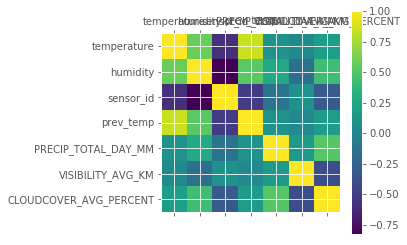

In [22]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

data_corelation = data.copy()
corr_matrix = data_corelation.corr()
plt.matshow(corr_matrix)
plt.xticks(range(len(corr_matrix.index)), corr_matrix.index)
plt.yticks(range(len(corr_matrix.index)), corr_matrix.index)
plt.colorbar()
plt.show()

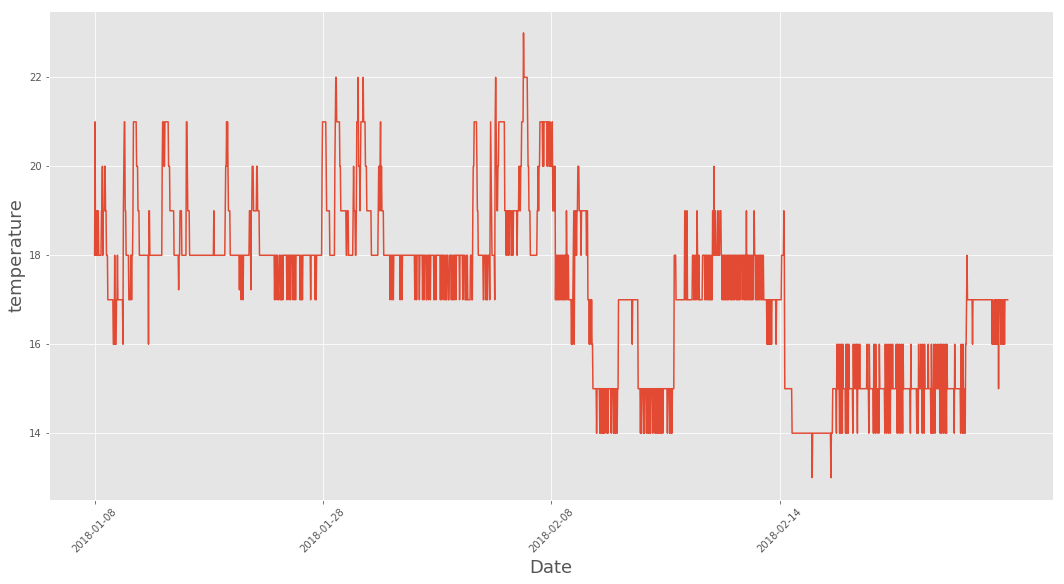

In [23]:
plt.figure(figsize = (18,9))
plt.plot(range(data.shape[0]), data['temperature'])
plt.xticks(range(0,data.shape[0],500),data['date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('temperature',fontsize=18)
plt.show()

In [24]:
data['hour'] = data['hour'].apply(lambda x: int(x.split(':')[0])*3600+int(x.split(':')[1])*60+int(x.split(':')[2]))
data['date'] = data['date'].apply(lambda x: time.mktime(datetime.datetime.strptime(x, "%Y-%m-%d").timetuple()) - time.mktime(datetime.datetime.strptime(x.split('-')[0], "%Y").timetuple()))
data = pd.get_dummies(columns=['OPINION'], data=data)

In [25]:
from sklearn.preprocessing import MinMaxScaler

X = data[data.columns.drop('temperature')]
scaler_x = MinMaxScaler()
X_scale = scaler_x.fit_transform(X)

y = data['temperature']



/home/sebastien/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Create training dataset
train_X, test_X, train_y, test_y = train_test_split(X_scale, y, random_state = 1)

from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

xgb_model = XGBRegressor(base_score=0.9, booster='gbtree', learning_rate=0.2, max_depth = 7)
xgb_model.fit(train_X, train_y, verbose=False)
val_pred = xgb_model.predict(test_X)
xgb_score = xgb_model.score(test_X, test_y)

print(mean_squared_error(val_pred, test_y))
print(xgb_score)

0.2455657840786862
0.9256635260744612


Index(['date', 'humidity', 'sensor_id', 'hour', 'prev_temp',
       'MAX_TEMPERATURE_C', 'MIN_TEMPERATURE_C', 'WINDSPEED_MAX_KMH',
       'TEMPERATURE_MORNING_C', 'TEMPERATURE_NOON_C', 'TEMPERATURE_EVENING_C',
       'PRECIP_TOTAL_DAY_MM', 'HUMIDITY_MAX_PERCENT', 'VISIBILITY_AVG_KM',
       'PRESSURE_MAX_MB', 'CLOUDCOVER_AVG_PERCENT', 'HEATINDEX_MAX_C',
       'DEWPOINT_MAX_C', 'WINDTEMP_MAX_C', 'WEATHER_CODE_MORNING',
       'WEATHER_CODE_NOON', 'WEATHER_CODE_EVENING',
       'OPINION_météo défavorable', 'OPINION_météo très défavorable'],
      dtype='object')


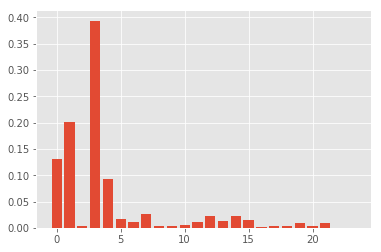

In [27]:
print(X.columns)


pyplot.bar(range(len(xgb_model.feature_importances_)), xgb_model.feature_importances_)
pyplot.show()

In [177]:
value = '20:11'
def format_as_min(val):
    if(int(val) < 10):
        return f'0{val}'
    return val

def get_hours_minus_x_min(hour, nb_min):
    return f'{hour[:2] if int(hour[-2:]) != 0 else int(hour[:2])-nb_min}:{ format_as_min(int(hour[-2:])-nb_min) if int(hour[-2:]) != 0 else 59 }'

print(get_hours_minus_x_min(value, -1))   

20:12
